In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv('/content/sizes.csv')
df.head()

,Height,Weight,Size
0,67,125,L
1,68,140,M
2,67,142,L
3,60,110,S
4,64,97,S


# Data shape

In [3]:
df.shape

(210, 3)

# Null values check

In [4]:
df.isna().sum()

Height    0
Weight    0
Size      0
dtype: int64

# Seperating features and target variables 

In [5]:
X=df.drop('Size',axis=1)
X=X.to_numpy() 
y= df['Size']

# Encoding target variables

In [6]:
le=LabelEncoder()
y=le.fit_transform(y)

In [7]:
svc=SVC()
parameters={
    'kernel':['rbf','linear'],
    'C':[0.1,1,10,50,100]
}


# Training error

In [8]:
cv=GridSearchCV(svc,parameters,cv=5)
cv.fit(X,y)
print('training error',cv.score(X,y))

training error 0.7619047619047619


# Best parameters for classifier

In [9]:
cv.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# decision boundary diagram for the classifier

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


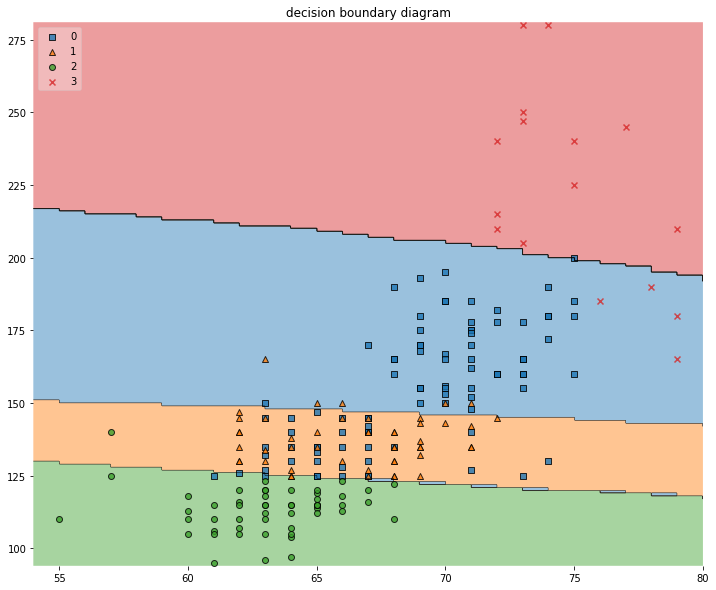

In [10]:
plt.figure(figsize=(12,10))
plot_decision_regions(X, y, clf=cv, legend=2);
plt.title('decision boundary diagram')
plt.show();

# Accurracy of classifier on the training set

In [11]:
accuracy_score(y,cv.predict(X))*100

76.19047619047619

# Question 2

In [12]:
def bestKNNClassifier(features, labels, neighbors_range, cv, score_type):
  """
  This function will take arguments like features,labels, neighbor, cv and score
  and will return the bestKNNClassifier by using the GridSearchCV method.
  """
  knn = KNeighborsClassifier()
  param_grid = {'n_neighbors': neighbors_range}
  knn_cv = GridSearchCV(knn, param_grid, cv=cv, scoring=score_type)
  knn_cv.fit(features, labels)
  return knn_cv

In [13]:
bestKNN=bestKNNClassifier(X,y,np.arange(2, 20),cv=10,score_type='accuracy')

In [14]:
bestKNN.score(X,y)

0.8714285714285714

In [15]:
bestKNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')